In [1]:
import pathlib
import sys
import os

# Hacky way to get to root package
if "notebooks" in os.getcwd():
    os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
    
import sys
from data_container import load_scouted_data, load_pit_data
import pandas as pd
import numpy as np
import plotly.express as px
pd.set_option('display.max_columns', None)

In [3]:
scouted_data = load_scouted_data()
scouted_data

,Scouter Initials,Match Number,Team Number,No Show,Auto Fuel,Auto Climbing Status,Auto Human Player Score,Teleop Fuel,Teleop Human Player Score,Endgame Climbing Level
0,abc,1,1678,False,14,True,12,49,6,L1
1,abc,1,3504,True,15,True,10,20,3,NaN
2,abc,1,8393,False,13,False,6,152,8,L2
3,abc,1,118,True,9,True,2,175,5,L1
4,abc,1,254,True,4,False,3,12,18,L3
5,abc,1,67,False,12,True,16,98,13,L1
6,abc,2,8393,False,7,False,10,190,8,L1
7,abc,2,67,True,15,True,7,144,30,L2
8,abc,2,118,True,3,True,14,64,26,NaN
9,abc,2,1678,False,2,False,1,198,0,L2


In [4]:
pit_data = load_pit_data()
pit_data

,Scouter Initials,Team Number,Intake,Climbing Level (Auto),Climbing Level (Endgame),Auto Start,Piece Auto,Climb type,Over Bumper?,Under Trench?,Carrying Capacity,Preload Number,Defense Skill (0-5)
0,abc,3504,Ground,1,1,right,16,in,True,False,8,8,2
1,abc,8393,Depot,0,2,right,6,in,False,True,12,6,1
2,abc,67,Ground,1,3,middle,3,out,True,True,6,3,4
3,abc,1678,Human Player Station,0,1,left,8,out,False,True,10,4,3
4,abc,118,Ground,1,1,left,0,in,True,True,10,0,5
5,abc,254,Human Player Station,1,0,middle,8,out,False,True,8,8,1
6,abc,2056,Depot,1,0,left,9,out,True,False,12,8,2


In [5]:
#auto_hp_fuel_df = scouted_data.groupby("Team Number")["Auto Human Player Score"].sum().reset_index()
#fig = px.bar(auto_hp_fuel_df, x="Team Number", y="Auto Human Player Score", title="Total Auto Human Player Score", 
#             labels={"Team Number": "team number", "Auto Human Player Score": "total fuel scored"})
#fig.show()

In [6]:
#teleop_hp_fuel_df = scouted_data.groupby("Team Number")["Teleop Human Player Score"].sum().reset_index()
#fig = px.bar(teleop_hp_fuel_df, x="Team Number", y="Teleop Human Player Score", title="Total Teleop Human Player Score", 
          #   labels={"Team Number": "team number", "Teleop Human Player Score": "total fuel scored"})
#fig.show()

In [7]:
#auto_hp_fuel_df = scouted_data.groupby("Team Number")["Auto Human Player Score"].mean().reset_index()
#fig = px.bar(auto_hp_fuel_df, x="Team Number", y="Auto Human Player Score", title="Average Auto Human Player Score", 
#             labels={"Team Number": "team number", "Auto Human Player Score": "avg fuel scored"})
#fig.show()

In [8]:
#teleop_hp_fuel_df = scouted_data.groupby("Team Number")["Teleop Human Player Score"].mean().reset_index()
#fig = px.bar(teleop_hp_fuel_df, x="Team Number", y="Teleop Human Player Score", title="Average Teleop Human Player Score", 
#             labels={"Team Number": "team number", "Teleop Human Player Score": "avg fuel scored"})
#fig.show()

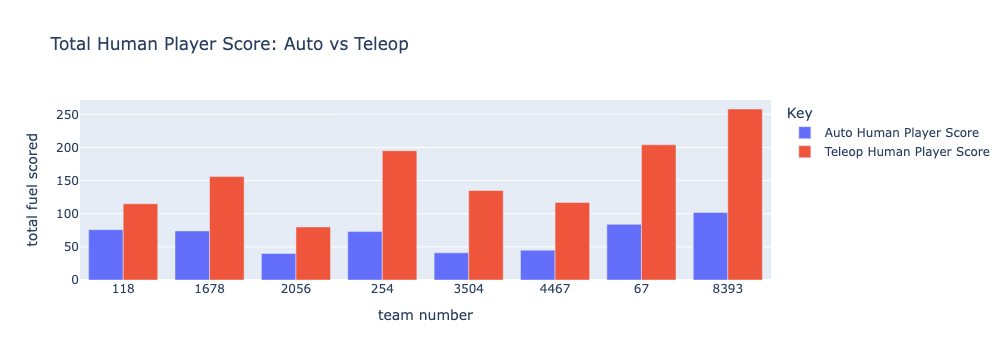

In [9]:
auto_hp_fuel_df = scouted_data.groupby("Team Number")["Auto Human Player Score"].sum().reset_index()
teleop_hp_fuel_df = scouted_data.groupby("Team Number")["Teleop Human Player Score"].sum().reset_index()

# Merging them together
combined_df = auto_hp_fuel_df.merge(teleop_hp_fuel_df, on="Team Number")

# Creates bar chart with both columns
fig = px.bar(combined_df, 
             x="Team Number", 
             y=["Auto Human Player Score", "Teleop Human Player Score"], 
             title="Total Human Player Score: Auto vs Teleop",
             labels={"Team Number": "team number", 
                     "value": "total fuel scored",
                     "variable": "Key"},
             barmode="group")  # This makes bars side-by-side instead of stacked
fig.show()

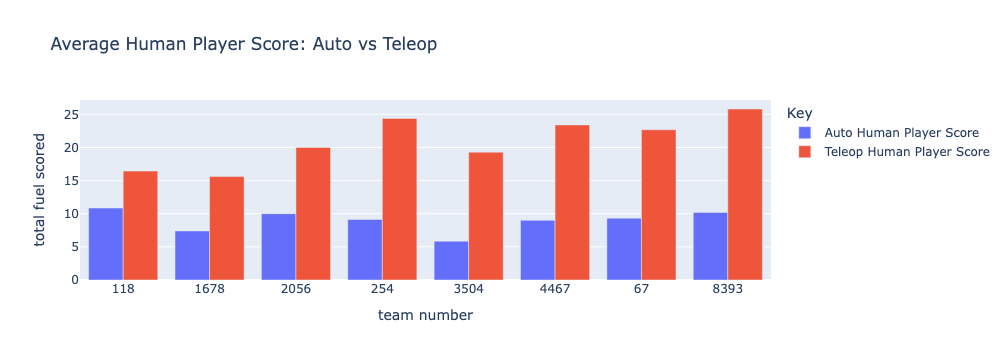

In [10]:


auto_hp_fuel_df = scouted_data.groupby("Team Number")["Auto Human Player Score"].mean().reset_index()
teleop_hp_fuel_df = scouted_data.groupby("Team Number")["Teleop Human Player Score"].mean().reset_index()

combined_df = auto_hp_fuel_df.merge(teleop_hp_fuel_df, on="Team Number")

fig = px.bar(combined_df, 
             x="Team Number", 
             y=["Auto Human Player Score", "Teleop Human Player Score"], 
             title="Average Human Player Score: Auto vs Teleop",
             labels={"Team Number": "team number", 
                     "value": "total fuel scored",
                     "variable": "Key"},
             barmode="group") 
fig.show()